# Creating final data for crop and fertilizer recommendation system

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [3]:
merge_fert.head()

Unnamed: 0         Crop   N   P   K   pH
0           0         rice  80  40  40  5.5
1           3        maize  80  40  20  5.5
2           5     chickpea  40  60  80  5.5
3          12  kidneybeans  20  60  20  5.5
4          13   pigeonpeas  20  60  20  5.5

In [4]:
del merge_fert['Unnamed: 0']

In [5]:
merge_fert.describe()

N           P           K         pH
count   22.000000   22.000000   22.000000  22.000000
mean    50.454545   45.681818   48.181818   5.409091
std     36.315715   32.634172   51.698426   0.590326
min     20.000000   10.000000   10.000000   4.000000
25%     20.000000   20.000000   20.000000   5.500000
50%     30.000000   40.000000   30.000000   5.500000
75%     80.000000   60.000000   50.000000   5.500000
max    120.000000  125.000000  200.000000   6.500000

In [6]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
plt.plot(merge_fert["N"])

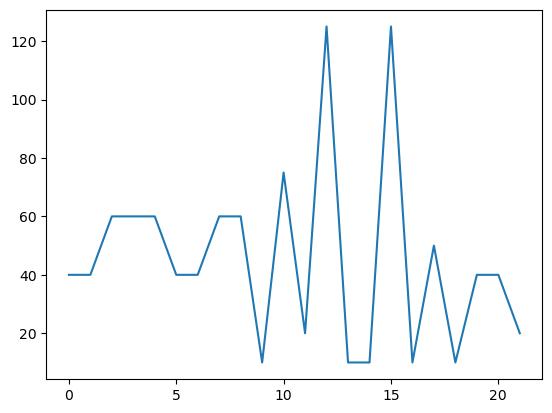

In [8]:
plt.plot(merge_fert["P"])

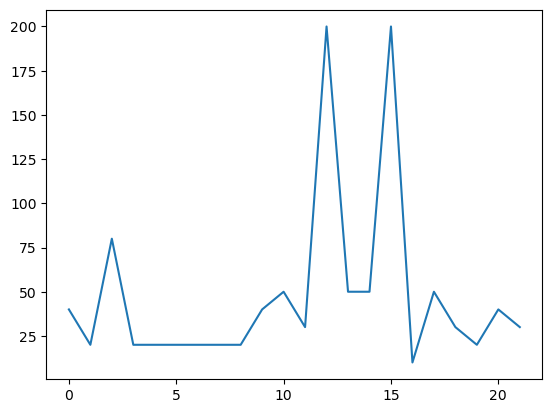

In [9]:
plt.plot(merge_fert["K"])

<AxesSubplot:>

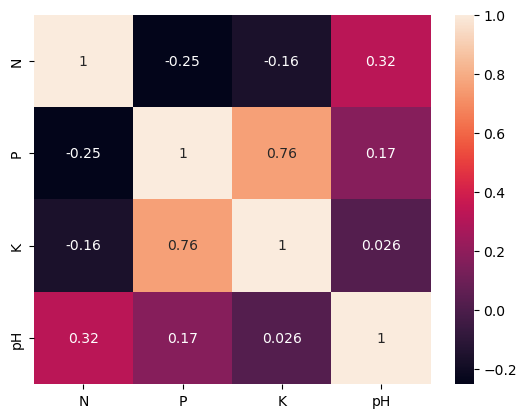

In [10]:
sns.heatmap(merge_fert.corr(),annot=True)

In [11]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [12]:

import pandas as pd
import random

temp = pd.DataFrame(columns=['N', 'P', 'K'])

for i in range(0, merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20, 20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5, 20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5, 5)
    d = {"N": N, "P": P, "K": K}
    temp = pd.concat([temp, pd.DataFrame(d, index=[0])], ignore_index=True)


In [13]:
temp

N   P   K
0      82  42  39
1      95  53  37
2      83  60  43
3      75  35  41
4      85  38  41
...   ...  ..  ..
2195   96  32  34
2196   90  16  29
2197  118  29  32
2198  113  36  30
2199   92  17  34

[2200 rows x 3 columns]

In [14]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [15]:
merge_crop

Unnamed: 0  temperature   humidity        ph    rainfall   label    N  \
0              0    20.879744  82.002744  6.502985  202.935536    rice   82   
1              1    21.770462  80.319644  7.038096  226.655537    rice   95   
2              2    23.004459  82.320763  7.840207  263.964248    rice   83   
3              3    26.491096  80.158363  6.980401  242.864034    rice   75   
4              4    20.130175  81.604873  7.628473  262.717340    rice   85   
...          ...          ...        ...       ...         ...     ...  ...   
2195         895    26.774637  66.413269  6.780064  177.774507  coffee   96   
2196         896    27.417112  56.636362  6.086922  127.924610  coffee   90   
2197         897    24.131797  67.225123  6.362608  173.322839  coffee  118   
2198         898    26.272418  52.127394  6.758793  127.175293  coffee  113   
2199         899    23.603016  60.396475  6.779833  140.937041  coffee   92   

       P   K  
0     42  39  
1     53  37  
2     60  43  
3     35  41  
4     38  41  
...   ..  ..  
2195  32  34  
2196  16  29  
2197  29  32  
2198  36  30  
2199  17  34  

[2200 rows x 9 columns]

In [16]:
del merge_crop['Unnamed: 0']

In [17]:
merge_crop

temperature   humidity        ph    rainfall   label    N   P   K
0       20.879744  82.002744  6.502985  202.935536    rice   82  42  39
1       21.770462  80.319644  7.038096  226.655537    rice   95  53  37
2       23.004459  82.320763  7.840207  263.964248    rice   83  60  43
3       26.491096  80.158363  6.980401  242.864034    rice   75  35  41
4       20.130175  81.604873  7.628473  262.717340    rice   85  38  41
...           ...        ...       ...         ...     ...  ...  ..  ..
2195    26.774637  66.413269  6.780064  177.774507  coffee   96  32  34
2196    27.417112  56.636362  6.086922  127.924610  coffee   90  16  29
2197    24.131797  67.225123  6.362608  173.322839  coffee  118  29  32
2198    26.272418  52.127394  6.758793  127.175293  coffee  113  36  30
2199    23.603016  60.396475  6.779833  140.937041  coffee   92  17  34

[2200 rows x 8 columns]

In [18]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [19]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [20]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [21]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  82  42  39    20.879744  82.002744  6.502985  202.935536  rice
1  95  53  37    21.770462  80.319644  7.038096  226.655537  rice
2  83  60  43    23.004459  82.320763  7.840207  263.964248  rice
3  75  35  41    26.491096  80.158363  6.980401  242.864034  rice
4  85  38  41    20.130175  81.604873  7.628473  262.717340  rice

In [22]:
df.shape

(2200, 8)